In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

# Question
# 1.What is the most frequent genre of movies released on Netflix?
# 2.Which has highest votes in vote avg column?
# 3.What movie got the highest popularity? what's its genre?
# 4.What movie got the lowest popularity? what's its genre?
# 5.Which year has the most filmmed movies?


In [55]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [57]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

#check duplicate

In [58]:
df.duplicated().sum()

np.int64(0)

# basic statistic

In [59]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


#  exploration summary

# 1)we have data frame of 9827 rown and 9 coloums.
# 2)our dataset have no NaNs or Duplicate dvalue.
# 3)Relase date coloum need to casted into date time and to extract only year value.
# 4)Overview,orignal language and poster url  would not be so usefull during analysis, so we will remove it.
# 5)there is noticable outlier in populirity coloum.
# 6)vote_average can be better catigorized for proper analysis.
# 7)Genre colum has comma seprated value and white spaces that needs to be handeled and casted to catigory Exploration summary

# Relase date coloum need to casted into date time and to extract only year value

In [60]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])


In [61]:
df['Release_Date']=df['Release_Date'].dt.year
print(df['Release_Date'].dtypes)

int32


In [62]:
df['Release_Date'].head()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32

# removing coloum

In [63]:
cols =['Overview','Original_Language','Poster_Url']

In [64]:
df.drop(cols,axis=1,inplace=True)

In [65]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


# catergorzing Vote_Average coloumn
# we would cout the Vote_Average vlaue and make four catigory :popular,average ,below popular and not popular to describe it more using catigorize_col() function

In [66]:
def categorize_col(df, col, labels):

    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
   
    df[col ] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    
    return df


In [67]:
labels=['not_popular','below _avg','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below _avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below _avg' < 'average' < 'popular']

In [68]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below _avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [69]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below _avg     2398
Name: count, dtype: int64

In [70]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# remove white space and trun to multiple lines in Genre

In [71]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below _avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [77]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'] = df['Genre'].str.replace(r'\s*,\s*', ',', regex=True)
df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df['Genre'] = df['Genre'].str.strip()

In [73]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [79]:
df['Genre'].dtypes

dtype('O')

In [ ]:
# df['Genre'] = df['Genre'].str.split(', ')

# df=df.explode('Genre').reset_index(drop=True)
# df.head()

In [74]:
# casting column to category


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 923.6+ KB


In [82]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Vasvilization

In [83]:
sns.set_style('whitegrid')

# 1.What is the most frequent genre of movies released on Netflix?

In [84]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

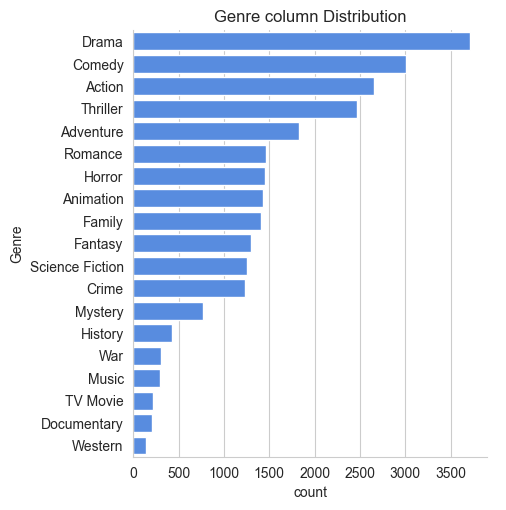

In [86]:
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5')
plt.title('Genre column Distribution')
plt.show()

# 2.Which has highest votes in vote avg column?

In [87]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [91]:
df['Voteunt'_Co].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25552 entries, 0 to 25551
Series name: Vote_Count
Non-Null Count  Dtype
--------------  -----
25552 non-null  int64
dtypes: int64(1)
memory usage: 199.8 KB


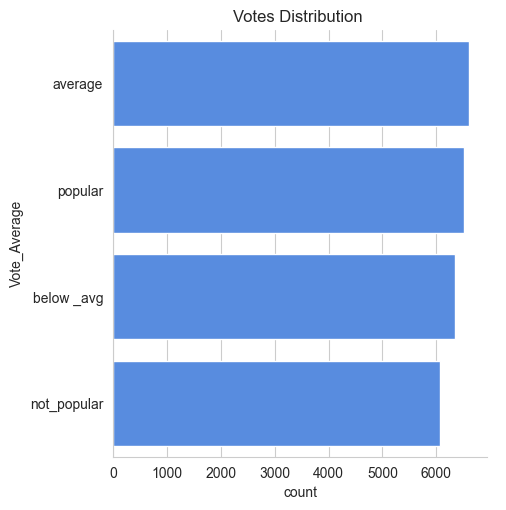

In [93]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5')
plt.title('Votes Distribution ')
plt.show()

# 3.What movie got the highest popularity? what's its genre?

In [95]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [96]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# 4.What movie got the lowest popularity? what's its genre?

In [97]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


# 5.Which year has the most filmmed movies?


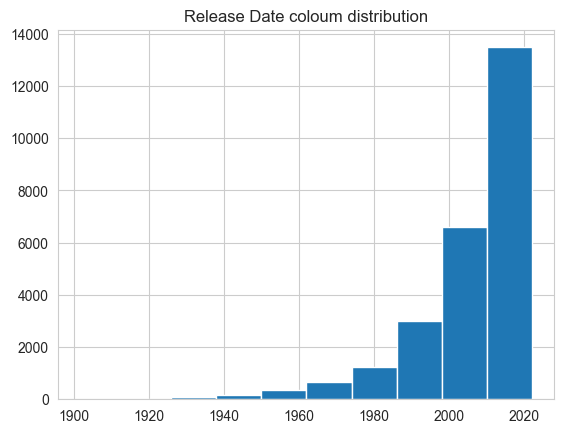

In [98]:
df['Release_Date'].hist()
plt.title('Release Date coloum distribution')
plt.show()

# summary:
# 1.What is the most frequent genre of movies released on Netflix?
# ans:The most Frequent Genre is Drama that is released on Netflex according to our data set.
# 2.Which has highest votes in vote avg column?
# ans:we have 25% of our data set with popular votes,and this is Drama.
# 3.What movie got the highest popularity? what's its genre?
# ans:Spider-Man: No Way Home is highest popularity according to our data set and it's Genre is Action,Adventure and Science Fiction.
# 4.What movie got the lowest popularity? what's its genre?
# ans:The United States vs. Billie Holiday is lowest popularity according to our data set and it's Genre is Music, Drama and History
# 5.Which year has the most filmmed movies?
# ans:2020 is the most filmmed movies year according to our Dataset.